# 🍔 Zomato Case Study – Paired t-Test

## 📌 Problem Statement
Zomato wants to evaluate whether the **UI redesign** has led to **increased average order value** per user.

## 🧠 5W1H Analysis

- **What**: Average order value before vs after UI redesign  
- **Why**: To test the effectiveness of the new interface  
- **When**: Data collected 1 month before and 1 month after launch  
- **Where**: Across multiple cities  
- **Who**: Same set of repeat users  
- **How**: Perform a Paired t-Test to compare before & after data for each user  

In [6]:
# 📦 Importing Required Libraries
import pandas as pd
import numpy as np

# Simulate dataset
np.random.seed(202)
n_users = 300

data = pd.DataFrame({
    'User_ID': np.arange(1, n_users + 1),
    'City': np.random.choice(['Mumbai', 'Bangalore', 'Delhi', 'Hyderabad', 'Chennai'], n_users),
    'Platform': np.random.choice(['Mobile', 'Desktop'], n_users),
    'Order_Value_Before': np.random.normal(loc=380, scale=60, size=n_users),
    'Order_Value_After': np.random.normal(loc=400, scale=55, size=n_users)
})

data['Order_Value_Diff'] = data['Order_Value_After'] - data['Order_Value_Before']
data.head()


,User_ID,City,Platform,Order_Value_Before,Order_Value_After,Order_Value_Diff
0,1,Hyderabad,Mobile,390.074664,470.158013,80.083349
1,2,Chennai,Desktop,437.688792,412.411878,-25.276914
2,3,Chennai,Mobile,410.543548,351.521921,-59.021627
3,4,Mumbai,Desktop,388.682375,370.873167,-17.809208
4,5,Bangalore,Desktop,436.687414,484.729368,48.041954


User_ID               0
City                  0
Platform              0
Order_Value_Before    0
Order_Value_After     0
Order_Value_Diff      0
dtype: int64


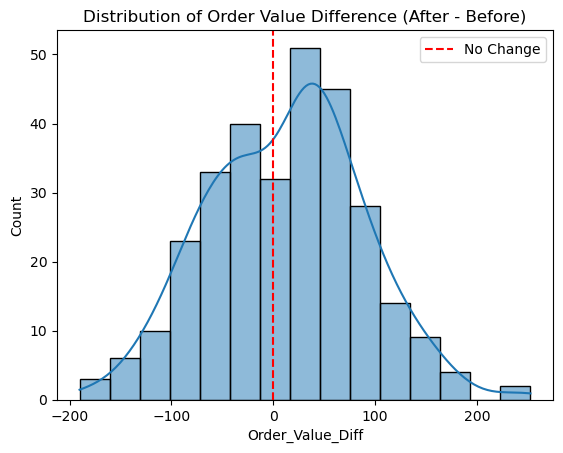

In [8]:
# 🔍 Data Cleaning
print(data.isnull().sum())

# 🧪 EDA
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Order_Value_Diff'], kde=True)
plt.axvline(x=0, color='red', linestyle='--', label='No Change')
plt.title("Distribution of Order Value Difference (After - Before)")
plt.legend()
plt.show()


In [10]:
from scipy.stats import ttest_rel

before = data['Order_Value_Before']
after = data['Order_Value_After']

# H0: Mean(before) = Mean(after)
# H1: Mean(after) > Mean(before)

t_stat, p_value = ttest_rel(after, before)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value (two-tailed): {p_value:.4f}")

# One-tailed (after > before)
p_value_one_tailed = p_value / 2
print(f"One-tailed P-Value: {p_value_one_tailed:.4f}")


T-Statistic: 2.8029
P-Value (two-tailed): 0.0054
One-tailed P-Value: 0.0027


## ✅ Interpretation + Business Impact

- 📊 If **p < 0.05**, we conclude that the UI redesign has **significantly increased** average order value.
- 🎉 This validates the success of the design from a revenue perspective.

### 💼 Business Impact

- If successful, Zomato can:
  - Roll out redesign across more regions.
  - Promote the update as a user-friendly improvement.
  - Predict higher revenue per customer post-redesign.
